<a href="https://colab.research.google.com/github/MariaFragoso/Adivinha_Python/blob/main/Profissao_Analista_de_dados_M13_Exercicio_V02_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [2]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE, 'r', encoding='utf-8') as file:
    fonte = BeautifulSoup(file, 'lxml')

    from bs4 import BeautifulSoup



<ipython-input-2-37f94c303328>:8: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(file, 'lxml')


In [6]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
# manipule os dados

# continue o codigo aqui
estados = fonte.find_all('estado')
lista_estados = []

for estado in estados:
    estado_lista = []
    nome = estado.find('nome').text
    sigla = estado.find('sigla').text
    regiao = estado.find('regiao').text
    estado_lista.append(nome)
    estado_lista.append(sigla)
    estado_lista.append(regiao)

    lista_estados.append(estado_lista)
for i in lista_estados:
  print(i)

['ACRE', 'AC', 'NORTE']
['ALAGOAS', 'AL', 'NORDESTE']
['AMAPA', 'AP', 'NORTE']
['AMAZONAS', 'AM', 'NORTE']
['BAHIA', 'BA', 'NORDESTE']
['CEARA', 'CE', 'NORDESTE']
['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE']
['ESPIRITO SANTO', 'ES', 'SUDESTE']
['GOIAS', 'GO', 'CENTRO-OESTE']
['MARANHAO', 'MA', 'NORDESTE']
['MATO GROSSO', 'MT', 'CENTRO-OESTE']
['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE']
['PARA', 'PA', 'NORTE']
['PARAIBA', 'PB', 'NORDESTE']
['PARANA', 'PR', 'SUL']
['PERNAMBUCO', 'PE', 'NORDESTE']
['PIAUI', 'PI', 'NORDESTE']
['RIO DE JANEIRO', 'RJ', 'SUDESTE']
['RIO GRANDE DO NORTE', 'RN', 'NORDESTE']
['RIO GRANDE DO SUL', 'RS', 'SUL']
['RONDONIA', 'RO', 'NORTE']
['RORAIMA', 'RR', 'NORTE']
['SANTA CATARINA', 'SC', 'SUL']
['SAO PAULO', 'SP', 'SUDESTE']
['SERGIPE', 'SE', 'NORDESTE']
['TOCANTINS', 'TO', 'NORTE']
['MINAS GERAIS', 'MG', 'SUDESTE']


In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

# continue o codigo aqui

import csv
titulo = ['estado','sigla','regiao']

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(NOME_ARQUIVO_DESTINO, mode='w', newline='') as arquivo:
  escrito_csv = csv.writer(arquivo, delimiter=";")
  escrito_csv.writerow(titulo)
  escrito_csv.writerows(lista_estados)
# continue o codigo aqui

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [5]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

cidades_bruto_df = pd.read_csv(NOME_ARQUIVO_FONTE, sep=',')

In [6]:
# visualize os resultados

cidades_bruto_df
# continue o codigo aqui
cidades_limpo_df = cidades_bruto_df[['UF','nome','Pop_est_2009','PIB','PIB_percapita']]
cidades_limpo_df

,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
1715,BAHIA,Aporá,18738,5.578780e+04,2977.260010
1716,MARANHÃO,Gonçalves Dias,16911,5.020111e+04,2968.550049
1717,SÃO PAULO,Alfredo Marcondes,4055,3.810474e+04,9396.980469
1718,PARÁ,Anajás,27386,6.253456e+04,2283.449951


In [7]:
# manipule os dados

novos_titulos = ['estado','cidade','populacao','pib','pib_percapita']
cidades_limpo_df.columns = novos_titulos
# continue o codigo aqui
cidades_limpo_df


,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
1715,BAHIA,Aporá,18738,5.578780e+04,2977.260010
1716,MARANHÃO,Gonçalves Dias,16911,5.020111e+04,2968.550049
1717,SÃO PAULO,Alfredo Marcondes,4055,3.810474e+04,9396.980469
1718,PARÁ,Anajás,27386,6.253456e+04,2283.449951


In [8]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'
cidades_limpo_df.to_csv('cidade-limpo.csv', index=False)
# continue o codigo aqui


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [9]:
# solução do exercício 1.3
cidades_limpo_df = pd.read_csv('/content/cidade-limpo.csv', sep=',')
estados_limpo_df = pd.read_csv('/content/estados-limpo.csv', sep=';')
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'SAO PAULO' if estado == 'SÃO PAULO' else estado)
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'PIAUI' if estado == 'PIAUÍ' else estado)
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'GOIAS' if estado == 'GOIÁS' else estado)
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'PARAIBA' if estado == 'PARAÍBA' else estado)
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'CEARA' if estado == 'CEARÁ' else estado)
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'PARANA' if estado == 'PARANÁ' else estado)
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'PARA' if estado == 'PARÁ' else estado)
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'MARANHAO' if estado == 'MARANHÃO' else estado)
cidades_limpo_df['estado'] = cidades_limpo_df['estado'].apply(lambda estado: 'AMAPA' if estado == 'AMAPÁ' else estado)
brasil_df=pd.merge(left=cidades_limpo_df, right=estados_limpo_df, how='outer')
brasil_df = brasil_df.fillna('')
brasil_df.to_csv('brasil.csv', index=False)


---

In [10]:
brasil_df

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,ACRE,Marechal Thaumaturgo,14275.0,109181.867188,7648.470215,AC,NORTE
1,ACRE,Senador Guiomard,19697.0,217153.859375,11024.719727,AC,NORTE
2,ACRE,Assis Brasil,5662.0,48347.300781,8538.910156,AC,NORTE
3,ACRE,Epitaciolândia,14224.0,129641.09375,9114.25,AC,NORTE
4,ACRE,Manoel Urbano,7505.0,61478.730469,8191.700195,AC,NORTE
...,...,...,...,...,...,...,...
1717,TOCANTINS,Axixá do Tocantins,9203.0,47001.585938,5107.200195,TO,NORTE
1718,TOCANTINS,Araguatins,26771.0,152885.484375,5710.859863,TO,NORTE
1719,TOCANTINS,Taguatinga,14655.0,110298.09375,7526.310059,TO,NORTE
1720,TOCANTINS,Lavandeira,1683.0,12126.014648,7205.0,TO,NORTE


## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [11]:
# solução do exercício 2.1
Brasil_df = pd.read_csv('/content/brasil.csv',sep=',')
Brasil_df


,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,ACRE,Marechal Thaumaturgo,14275.0,109181.867188,7648.470215,AC,NORTE
1,ACRE,Senador Guiomard,19697.0,217153.859375,11024.719727,AC,NORTE
2,ACRE,Assis Brasil,5662.0,48347.300781,8538.910156,AC,NORTE
3,ACRE,Epitaciolândia,14224.0,129641.093750,9114.250000,AC,NORTE
4,ACRE,Manoel Urbano,7505.0,61478.730469,8191.700195,AC,NORTE
...,...,...,...,...,...,...,...
1717,TOCANTINS,Axixá do Tocantins,9203.0,47001.585938,5107.200195,TO,NORTE
1718,TOCANTINS,Araguatins,26771.0,152885.484375,5710.859863,TO,NORTE
1719,TOCANTINS,Taguatinga,14655.0,110298.093750,7526.310059,TO,NORTE
1720,TOCANTINS,Lavandeira,1683.0,12126.014648,7205.000000,TO,NORTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [12]:
# código para responder a pergunta

as_10_mais_populosoas_df = Brasil_df.sort_values(by=['populacao'],ascending=False).head(10).reset_index(drop=True)['cidade']
print('As 10 cidades mais populosas do Brasil são:')
as_10_mais_populosoas_df


As 10 cidades mais populosas do Brasil são:


,cidade
0,Rio de Janeiro
1,Salvador
2,Manaus
3,Porto Alegre
4,Goiânia
5,São Bernardo do Campo
6,Teresina
7,Campo Grande
8,Santo André
9,Uberlândia


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [13]:
# código para responder a pergunta

regiao_nordeste_df = Brasil_df[['cidade','pib_percapita','regiao']]
as_5_menores_regiao_nordeste = Brasil_df.query('regiao == "NORDESTE"').sort_values(by=['pib_percapita']).head().reset_index(drop=True)
as_5_menores_regiao_nordeste[['estado','cidade','pib_percapita']]

,estado,cidade,pib_percapita
0,BAHIA,Lamarão,2327.149902
1,PIAUI,Dom Inocêncio,2358.239990
2,PIAUI,São Lourenço do Piauí,2566.340088
3,PIAUI,Lagoa de São Francisco,2623.340088
4,MARANHAO,Santo Amaro do Maranhão,2632.239990


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [14]:
# código para responder a pergunta
estado_de_sp_df = Brasil_df[['cidade','pib','estado']]
as_15_maiores_de_sp = Brasil_df.query('estado == "SAO PAULO"').sort_values(by=['pib'], ascending=False).head(15).reset_index(drop=True)
as_15_maiores_de_sp[['estado','cidade','pib']]


,estado,cidade,pib
0,SAO PAULO,São Bernardo do Campo,28935768.00
1,SAO PAULO,Santos,22546134.00
2,SAO PAULO,Santo André,14709603.00
3,SAO PAULO,Ribeirão Preto,14688064.00
4,SAO PAULO,Taubaté,8324691.00
5,SAO PAULO,São José do Rio Preto,7879047.50
6,SAO PAULO,Paulínia,7779836.50
7,SAO PAULO,Mauá,6574846.50
8,SAO PAULO,Limeira,5752286.00
9,SAO PAULO,Cotia,5427421.50


 - Qual é o PIB do estado de Santa Catarina?

In [15]:
# código para responder a pergunta
pib_santa_catarina = Brasil_df[['estado','pib']].groupby('estado').agg('sum').loc['SANTA CATARINA','pib']
print("O PIB de Santa Catarina é:", pib_santa_catarina)

O PIB de Santa Catarina é: 49211256.828125


 - Qual é o população da região sul?

In [16]:
# código para responder a pergunta
populacao_sul = Brasil_df[['regiao','populacao']].groupby('regiao').agg('sum').loc['SUL','populacao']
print("A populacao total da região Sul é de:", populacao_sul)

A populacao total da região Sul é de: 9175761.0


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [17]:
# código para responder a pergunta
pib_medio_matogrossodosul = Brasil_df[['estado','pib_percapita']].groupby('estado').agg('mean').loc['MATO GROSSO DO SUL','pib_percapita']
print("O PIB percapita médio do estado do Mato Grosso do Sul é de:", pib_medio_matogrossodosul)


O PIB percapita médio do estado do Mato Grosso do Sul é de: 14798.2034179685


 - Qual é a população do Brasil?

In [21]:
# código para responder a pergunta

populacao_brasil = Brasil_df['populacao'].agg('sum')
print('A população do Brasil é de:', populacao_brasil)



A população do Brasil é de: 61837115.0


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

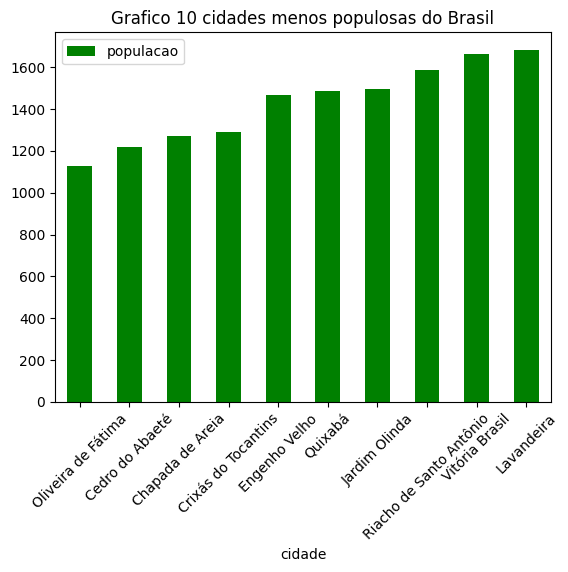

In [22]:
# código para gerar a visualização
menos_populosas_df = Brasil_df[['cidade','populacao']].sort_values(by=['populacao']).head(10).reset_index(drop=True)
menos_populosas_df
grafico = menos_populosas_df.plot.bar(x='cidade',y='populacao', rot=45, color='green',title='Grafico 10 cidades menos populosas do Brasil')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: title={'center': 'Grafico com a proporção da população do Brasil por região'}, ylabel='populacao'>

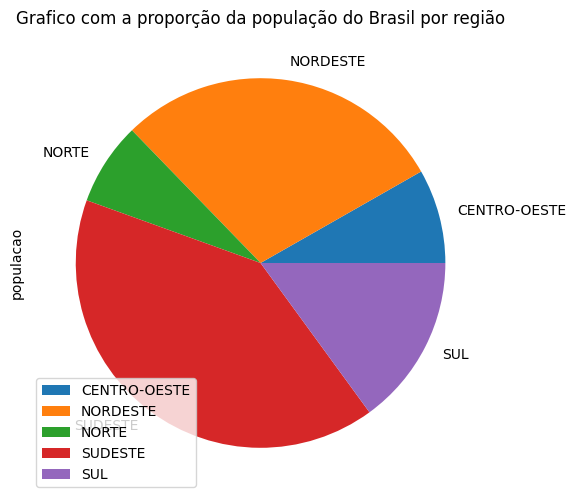

In [23]:
# código para gerar a visualização


populacao_por_regiao_df= Brasil_df[['regiao','populacao']].groupby('regiao').agg('sum')
populacao_por_regiao_df
populacao_por_regiao_df.plot.pie(y='populacao', title='Grafico com a proporção da população do Brasil por região', figsize=(11, 6))
